Initial Data Loading and Cleaning

In [15]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#define relative path to dataset
path_train = '/Users/sumaiyauddin/Documents/ML/Project/Project Repo/sign_mnist_train.csv'
path_test = '/Users/sumaiyauddin/Documents/ML/Project/Project Repo/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

In [17]:
#saving data into pandas dataframes 
test = pd.read_csv(path_test)
train = pd.read_csv(path_train)

In [18]:
#printing shape
print(f'Train Shape:{train.shape}')
print(f'Test Shape:{test.shape}')


Train Shape:(27455, 785)
Test Shape:(7172, 785)


The training dataset consists of 27455 28x28 pixel grayscale images, including the associated label. The testing dataset consists of 7172 28x28 images. The label and pixels are split into X and y for both training and testing data.

In [19]:
#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

The below is a function to find the indices of a specified label.

In [20]:
#fuction to find the indices given a label 
def find_indices(data,label):
    #check if data is numpy array
    if type(data) == np.ndarray:
        #return indices
        return np.where(data==label)
    #check if data is pandas series 
    elif type(data) == pd.Series:
        #return indices
        return data[data==label].index
    #else not supported in this function
    else:
        raise Exception('Not supported data type for this function.')

Creating a dictionary where key is the numeric label in the dataset and value is the corresponding letter.

In [21]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

Inspecting examples for each letter in the dataset.

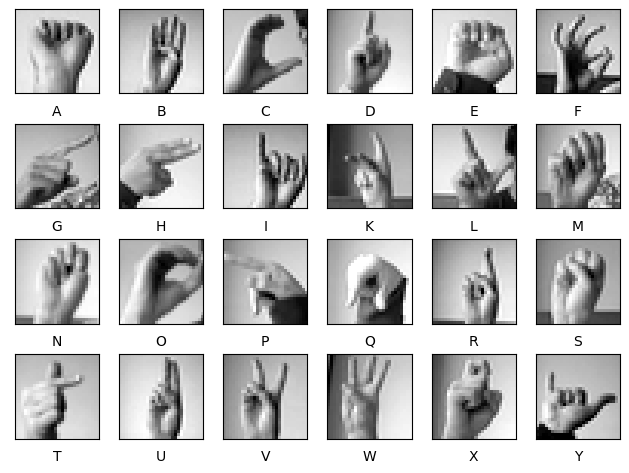

In [22]:
#visualization of dataset 
fix, ax = plt.subplots(4,6)
ax = ax.ravel()
pos = 0 

#loop through each label in dataset 
for label in range(0,26):
    #if label is not included in dataset 
    if label in [9,25]:
        continue
    #find first index of label
    idx = find_indices(y_train,label)[0]
    #display first found image 
    ax[pos].imshow(X_train.iloc[idx,:].values.reshape(res),cmap='gray')
    #set x label as dataset label
    ax[pos].set(xlabel=labels[label])
    #do not show ticks 
    ax[pos].set_xticks([])
    ax[pos].set_yticks([])
    #increment for subplotting 
    pos+=1

plt.tight_layout()
plt.show()

### EDA
we can look how image will looks like for each class if we average it. for that we can take avegare valuse of each pixel across all observation.

To take the average image for each class, we can group the training data by label and then calculate the mean of each pixel across all observations with the same label.


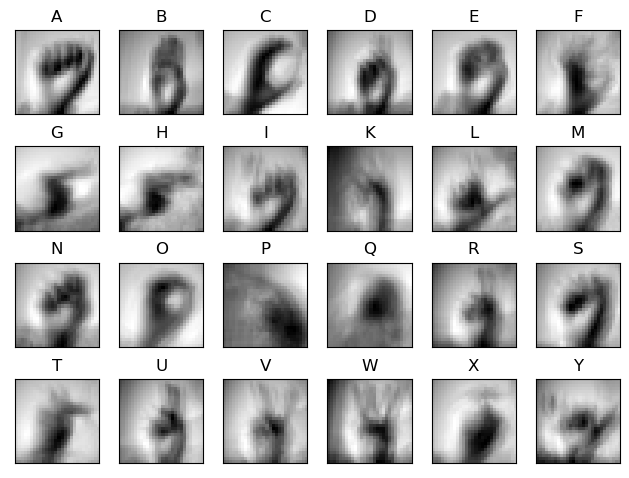

In [24]:
# Create a new column in the training dataframe with the corresponding letter label
train['letter'] = train['label'].map(labels)

# Group the training data by label and calculate the mean of each pixel across all observations with the same label
mean_images = train.groupby('letter').mean().drop(columns=['label'])

# Plot the average image for each class
fig, ax = plt.subplots(4, 6)
ax = ax.ravel()
for i, (letter, image) in enumerate(mean_images.iterrows()):
    ax[i].imshow(image.values.reshape(res), cmap='gray')
    ax[i].set_title(letter)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()
